In [1]:
import sys

sys.path.append("../")

import torch

from torchemlp.reps import V
from torchemlp.groups import Z, S, SO, O, O13, SO13
from torchemlp.utils import vis, vis_basis, DEFAULT_DEVICE

In [2]:
G = Z(4)
rep = V(G)

v = torch.randn(rep.size, device=DEFAULT_DEVICE)
g = G.sample()

print(f"𝜌(g) =\n{rep.rho(g)}")
print(f"v = {v}")
print(f"𝜌(g)v = {rep.rho(g) @ v:}")

𝜌(g) =
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
v = tensor([-0.1226, -0.7311,  0.9103, -0.5889])
𝜌(g)v = tensor([-0.1226, -0.7311,  0.9103, -0.5889])


In [3]:
print(f"V(Z(5))'s Equivariant Basis: {V(Z(5)).equivariant_basis().dense()}")

V(Z(5))'s Equivariant Basis: tensor([[0.4472],
        [0.4472],
        [0.4472],
        [0.4472],
        [0.4472]])


In [4]:
G = Z(6)
repin = V(G)
repout = V(G)

conv_basis = (repin >> repout).equivariant_basis().dense()

In [5]:
conv_basis[:, 0]

tensor([ 0.3938, -0.0120, -0.0521, -0.0372,  0.0821,  0.0241,  0.0241,  0.3938,
        -0.0120, -0.0521, -0.0372,  0.0821,  0.0821,  0.0241,  0.3938, -0.0120,
        -0.0521, -0.0372, -0.0372,  0.0821,  0.0241,  0.3938, -0.0120, -0.0521,
        -0.0521, -0.0372,  0.0821,  0.0241,  0.3938, -0.0120, -0.0120, -0.0521,
        -0.0372,  0.0821,  0.0241,  0.3938])

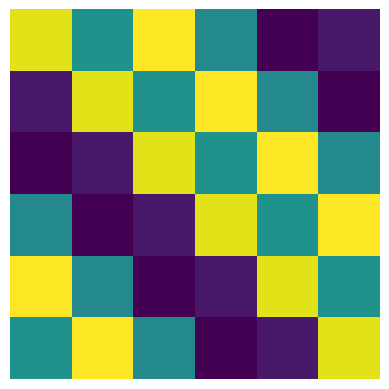

In [6]:
vis_basis(conv_basis, (repin.size, repout.size))

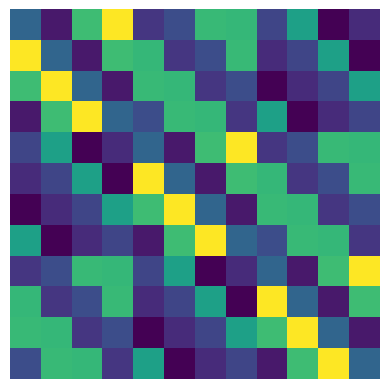

In [7]:
G = Z(3) * Z(4)
repin = V(G)
repout = V(G)
vis(repin, repout)

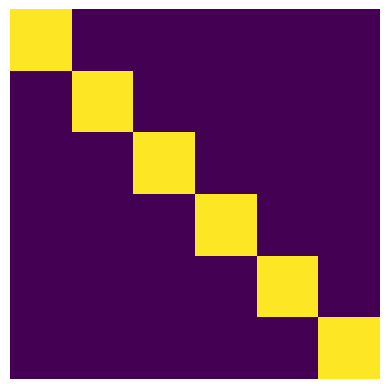

In [8]:
repin = V(S(6))
repout = V(S(6))
vis(repin, repout)

Basis matrix of shape torch.Size([1296, 15])


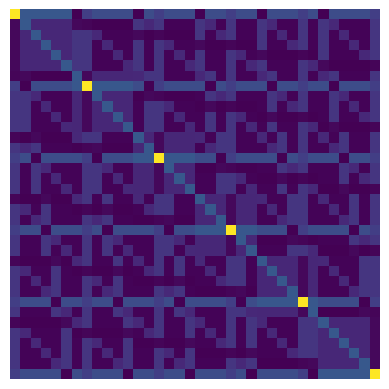

In [9]:
repin = V(S(6)) ** 2
repout = V(S(6)) ** 2
vis(repin, repout)
print(f"Basis matrix of shape {(repin>>repout).equivariant_basis().shape}")

Basis matrix of shape torch.Size([27, 1])


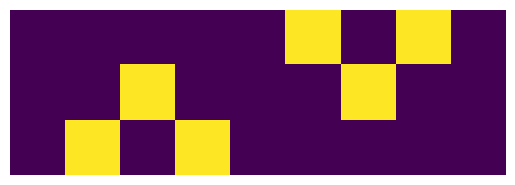

In [10]:
W = V(SO(3))
repin = W**2
repout = W
Q = (repin >> repout).equivariant_basis().dense()
print(f"Basis matrix of shape {Q.shape}")
vis(repin, repout)

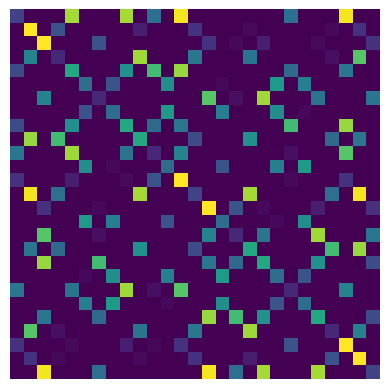

In [11]:
vis(W**3, W**3)

Krylov Solving for Equivariant Subspace r<=160: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


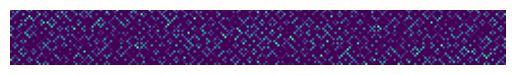

In [12]:
repin = W**5
repout = W**3
Q = (repin >> repout).equivariant_basis().dense()
vis_basis(Q, (repout.size, repin.size))

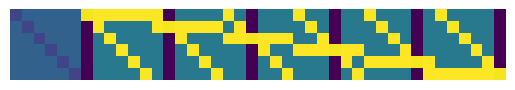

In [13]:
W = V(S(6))
repin = W + W**2  # (one set feature and one edge feature)
repout = W  # (one set feature)

rep_map = repin >> repout
Q = rep_map.equivariant_basis().dense()
vis_basis(Q, (repout.size, repin.size))

In [14]:
W = V(S(6))
repin = 100 * W**0 + 100 * W + 20 * W**2
repout = repin
rep_map = repin >> repout
print(f"{rep_map}, of size {rep_map.size}")

# Don't densify, you don't have enough memory!
Q = rep_map.equivariant_basis()
print(f"Basis matrix of shape {Q.shape}")

10000V⁰+20000V+14000V²+4000V³+400V⁴, of size 2016400
Basis matrix of shape (2016400, 84000)


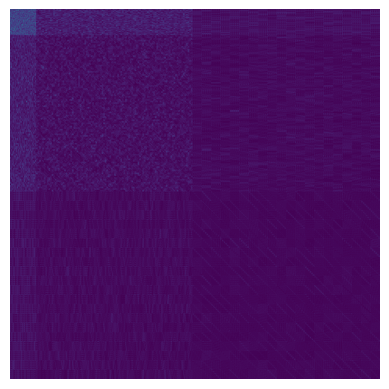

In [15]:
# Don't densify, you don't have enough memory!
P = rep_map.equivariant_projector()
v = torch.randn(P.shape[-1], device=DEFAULT_DEVICE)
v = torch.abs(P @ v).reshape(repout.size, repin.size)

import matplotlib.pyplot as plt

plt.imshow(v.detach().cpu().numpy())
plt.axis("off");